In [1]:
from vpython import*
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

<IPython.core.display.Javascript object>

# Random generator uniformity confirmation

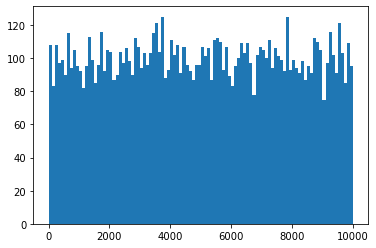

In [2]:
x = 10000
numList = []
a = np.random.randint(10000, size=10000)

[numList.append(i) for i in range(x)]
 
plt.hist(a, bins = 100)

plt.show()

# 1a.) Random Walker

In [3]:
scene1 = canvas()

<IPython.core.display.Javascript object>

In [2]:
N = 10000 # number of samples 
t = 0
dt = 100./N
walker = sphere(pos=vector(0,0,0), make_trail=True)

# function to move walker based on random values from [-1, 1]
def walk(thing):
    
    positions = np.array([1, -1]) # set bounds of random values
    direction = np.random.choice(positions, size=2) # returns an integer array of 2 values
    
    # walker's position is updated as a sum of its previous position and newly generated position
    thing.pos += vector(direction[0], direction[1], 0) 
    
    
    return thing.pos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
while(t <= N/1000):
    rate(20)
    walk(walker)
    t += dt

# Expected distance

In [4]:
# no visualization
iterations = 20 # number of interations to run 
deltaX = [] # list to store each iteration's last position
dist = 0

# function to run multiple iterations of walk
def testRun(arr):
    walker_temp = sphere(visible=False, pos=vector(0,0,0))
    for j in range(N):
        x = walk(walker_temp)
        
    arr.append(x)

[testRun(deltaX) for i in range(iterations)]

# add the magnitude of each vector 
for x in deltaX:
    dist += mag(x)
    
avgDist = dist/iterations

print("Average Distance: ", avgDist)
print("Expected Disctance: ", sqrt(N))

Average Distance:  124.89632126346774
Expected Disctance:  100.0


# 1D Cellular Automaton

In [5]:
binary = np.array([[4], [2], [1]])

def step(x, rule):
    x_right = np.roll(x, 1)  
    x_left = np.roll(x, -1)
    y = np.vstack((x_right, x, x_left)).astype(np.int8) 
    z = np.sum(binary * y, axis=0).astype(np.int8)

    return rule[7 - z]

In [13]:
def cellular_automaton(rule_number, size, steps,
                       init_cond='random', impulse_pos='center'):
    
    assert 0 <= rule_number <= 255/*
    assert init_cond in ['random', 'impulse']
    assert impulse_pos in ['left', 'center', 'right']
    
    rule_binary_str = np.binary_repr(rule_number, width=8)
    rule_binary = np.array([int(ch) for ch in rule_binary_str], dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    
    if init_cond == 'random':  
        x[0, :] = np.array(np.random.rand(size) < 0.5, dtype=np.int8)

    if init_cond == 'impulse':
        if impulse_pos == 'left':
            x[0, 0] = 1
        elif impulse_pos == 'right':
            x[0, size - 1] = 1
        else:
            x[0, size // 2] = 1
    
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_binary)
    
    return x

MovieWriter ffmpeg unavailable; using Pillow instead.


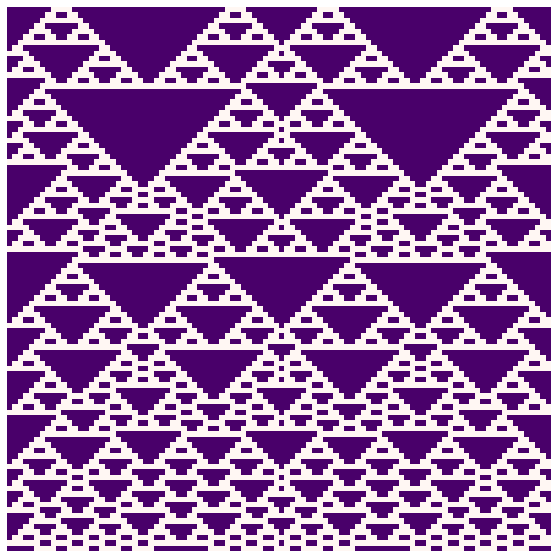

In [14]:
rule = 129
size = 100  
steps = 500 
init_cond='impulse' 
impulse_pos='center'

x = cellular_automaton(rule, size, steps, init_cond, impulse_pos)

steps_to_show = 100    
frames = int(steps)  
interval=50  

fig = plt.figure(figsize=(10, 10))

ax = plt.axes()
ax.set_axis_off()

def animate(i):
    ax.clear()  
    ax.set_axis_off()  
    
    Y = np.zeros((steps_to_show, size), dtype=np.int8)  
    upper_boundary = (i + 1) * iterations_per_frame  
    lower_boundary = 0 if upper_boundary <= steps_to_show else upper_boundary - steps_to_show 
    for t in range(lower_boundary, upper_boundary):  
        Y[t - lower_boundary, :] = x[t, :]
    
    img = ax.imshow(Y, interpolation='none',cmap='RdPu')
    return [img]
    

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
anim.save('elementary_cellular_automaton.gif') 